Computed d1: 0.0935
N(d1) (Cumulative probability up to d1): 0.5373


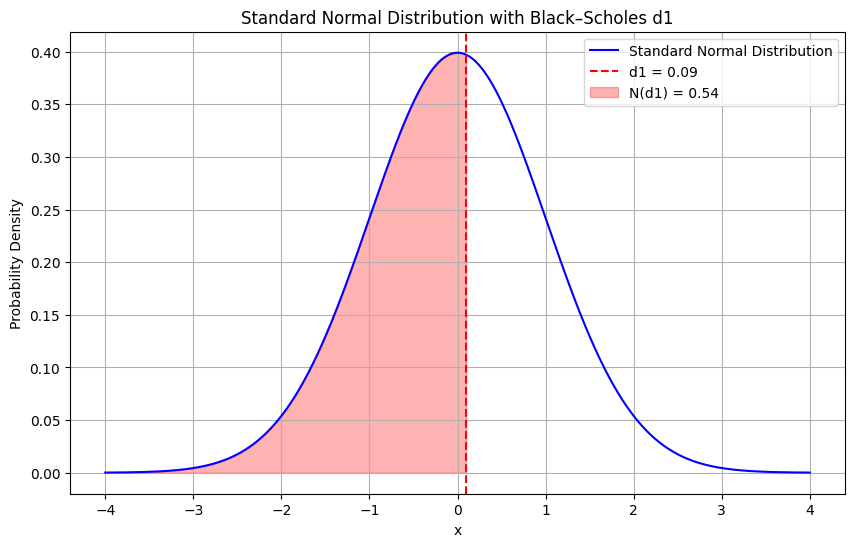

In [12]:
#!/usr/bin/env python3
"""
This script computes the Black–Scholes parameter d1 and visualizes it
on the standard normal distribution curve. The area to the left of d1
is shaded to represent the cumulative probability N(d1).
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -------------------------------
# 1. Define Input/Default Parameters
# -------------------------------

# You can set these parameters as default values.
S0 = 95       # Current stock price
X = 100        # Strike price
r = 0.05       # Risk-free interest rate (e.g., 0.05 for 5%)
sigma = 0.2    # Volatility (e.g., 0.2 for 20%)
t = 1          # Time to expiration in years

# Alternatively, you could uncomment the following lines to allow user input:
# try:
#     S0 = float(input("Enter current stock price S0: "))
#     X = float(input("Enter strike price X: "))
#     r = float(input("Enter risk-free interest rate r (e.g., 0.05 for 5%): "))
#     sigma = float(input("Enter volatility sigma (e.g., 0.2 for 20%): "))
#     t = float(input("Enter time to expiration t (in years): "))
# except ValueError:
#     print("Invalid input. Using default values.")

# -------------------------------
# 2. Compute d1
# -------------------------------
# The Black–Scholes d1 parameter is given by:
#   d1 = [ln(S0/X) + (r + sigma^2/2) * t] / (sigma * sqrt(t))
d1 = (np.log(S0 / X) + (r + 0.5 * sigma ** 2) * t) / (sigma * np.sqrt(t))

# Compute the cumulative probability up to d1 under the standard normal distribution
Nd1 = norm.cdf(d1)

# Print computed values for debugging or informational purposes
print(f"Computed d1: {d1:.4f}")
print(f"N(d1) (Cumulative probability up to d1): {Nd1:.4f}")

# -------------------------------
# 3. Plot the Standard Normal Distribution Curve
# -------------------------------
# Create an array of x values for plotting the standard normal distribution.
# We choose a range that typically covers most of the probability mass.
x = np.linspace(-4, 4, 1000)

# Calculate the probability density function (PDF) for these x values.
y = norm.pdf(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color='blue')

# -------------------------------
# 4. Visualize d1 on the Plot
# -------------------------------
# Plot a vertical dashed red line at the computed d1 value.
plt.axvline(x=d1, color='red', linestyle='--', label=f'd1 = {d1:.2f}')

# Shade the area to the left of d1 to represent N(d1)
# Create a subset of x values from the left end of the plot up to d1.
x_fill = np.linspace(-4, d1, 1000)
y_fill = norm.pdf(x_fill)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label=f'N(d1) = {Nd1:.2f}')

# -------------------------------
# 5. Annotate and Display the Plot
# -------------------------------
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution with Black–Scholes d1')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/zj/457h49q94cdgkl_1qltyy01w0000gq/T/ipykernel_90488/1798156273.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  expected_payoff = np.trapz(weighted_payoff, x)


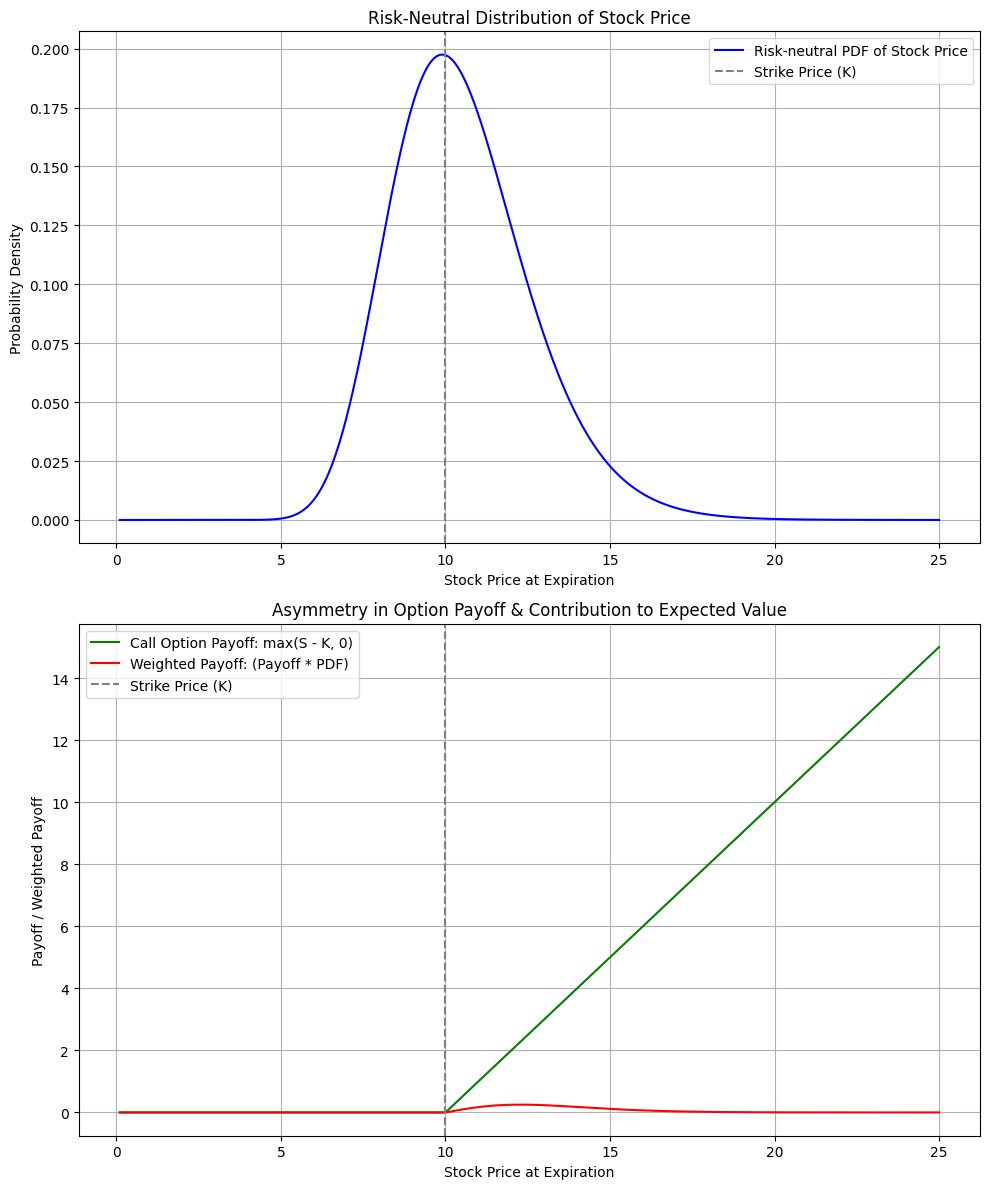

Risk-neutral expected stock price: 10.51
Risk-neutral expected option payoff (non-discounted): 1.10


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters
S0 = 10            # Current stock price
K = 10             # Strike price (we set it equal to S0 for simplicity)
r = 0.05           # Risk-free rate
sigma = 0.2        # Volatility
t = 1              # Time to expiration (in years)

# For a risk-neutral process, the stock price at time t is:
# S_t = S0 * exp((r - 0.5*sigma**2)*t + sigma*sqrt(t)*z)
# Thus, ln(S_t) is normally distributed with mean = ln(S0) + (r - 0.5*sigma**2)*t
# and standard deviation = sigma * sqrt(t).

mu = np.log(S0) + (r - 0.5*sigma**2)*t
s = sigma * np.sqrt(t)
scale = np.exp(mu)

# Create a range of stock prices for plotting
x = np.linspace(0.1, 25, 1000)

# Lognormal PDF of the stock price under the risk-neutral measure
pdf = lognorm.pdf(x, s=s, scale=scale)

# Define the call option payoff function at expiration: max(S - K, 0)
payoff = np.maximum(x - K, 0)

# The weighted payoff distribution (contribution to expected payoff)
weighted_payoff = payoff * pdf

# Calculate the risk-neutral expected stock price:
E_S = S0 * np.exp(r * t)

# Calculate the expected option payoff (ignoring discounting for illustration)
expected_payoff = np.trapz(weighted_payoff, x)

# Plot the PDF and the payoff function
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Underlying stock's risk-neutral PDF and the call payoff function
ax[0].plot(x, pdf, 'b-', label='Risk-neutral PDF of Stock Price')
ax[0].set_xlabel('Stock Price at Expiration')
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Risk-Neutral Distribution of Stock Price')
ax[0].axvline(K, color='gray', linestyle='--', label='Strike Price (K)')
ax[0].legend()
ax[0].grid(True)

# Plot 2: Option payoff (asymmetric) and weighted payoff
ax[1].plot(x, payoff, 'g-', label='Call Option Payoff: max(S - K, 0)')
ax[1].plot(x, weighted_payoff, 'r-', label='Weighted Payoff: (Payoff * PDF)')
ax[1].set_xlabel('Stock Price at Expiration')
ax[1].set_ylabel('Payoff / Weighted Payoff')
ax[1].set_title('Asymmetry in Option Payoff & Contribution to Expected Value')
ax[1].axvline(K, color='gray', linestyle='--', label='Strike Price (K)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Risk-neutral expected stock price: {E_S:.2f}")
print(f"Risk-neutral expected option payoff (non-discounted): {expected_payoff:.2f}")


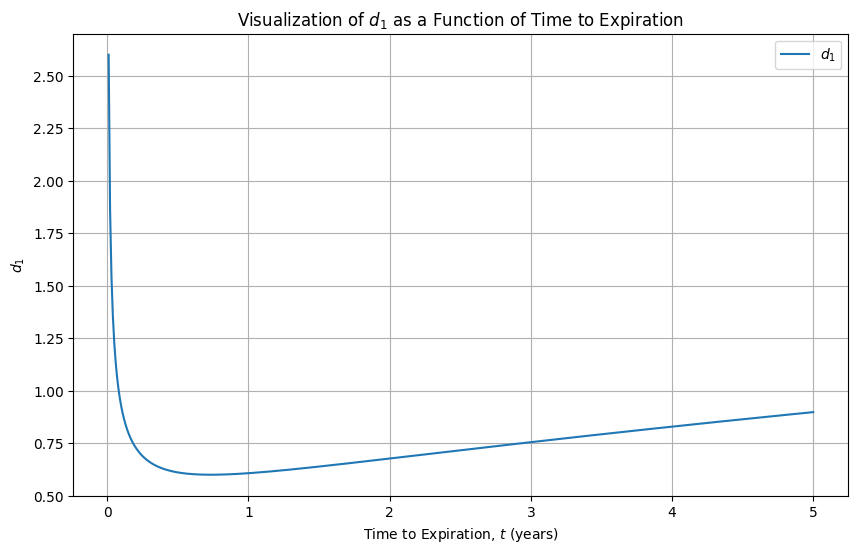

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define fixed parameters
S0 = 100      # Current stock price
X = 95        # Strike price
r = 0.05      # Risk-free interest rate (annual)
sigma = 0.2   # Volatility (annual)

# Create an array of time to expiration values (in years)
# We avoid t=0 to prevent division by zero.
t_values = np.linspace(0.01, 5, 500)

# Compute d1 for each time value using the Black-Scholes formula for d1
d1_values = (np.log(S0 / X) + (r + 0.5 * sigma**2) * t_values) / (sigma * np.sqrt(t_values))

# Plot d1 as a function of time to expiration
plt.figure(figsize=(10, 6))
plt.plot(t_values, d1_values, label=r'$d_1$')
plt.xlabel('Time to Expiration, $t$ (years)')
plt.ylabel(r'$d_1$')
plt.title(r'Visualization of $d_1$ as a Function of Time to Expiration')
plt.legend()
plt.grid(True)
plt.show()


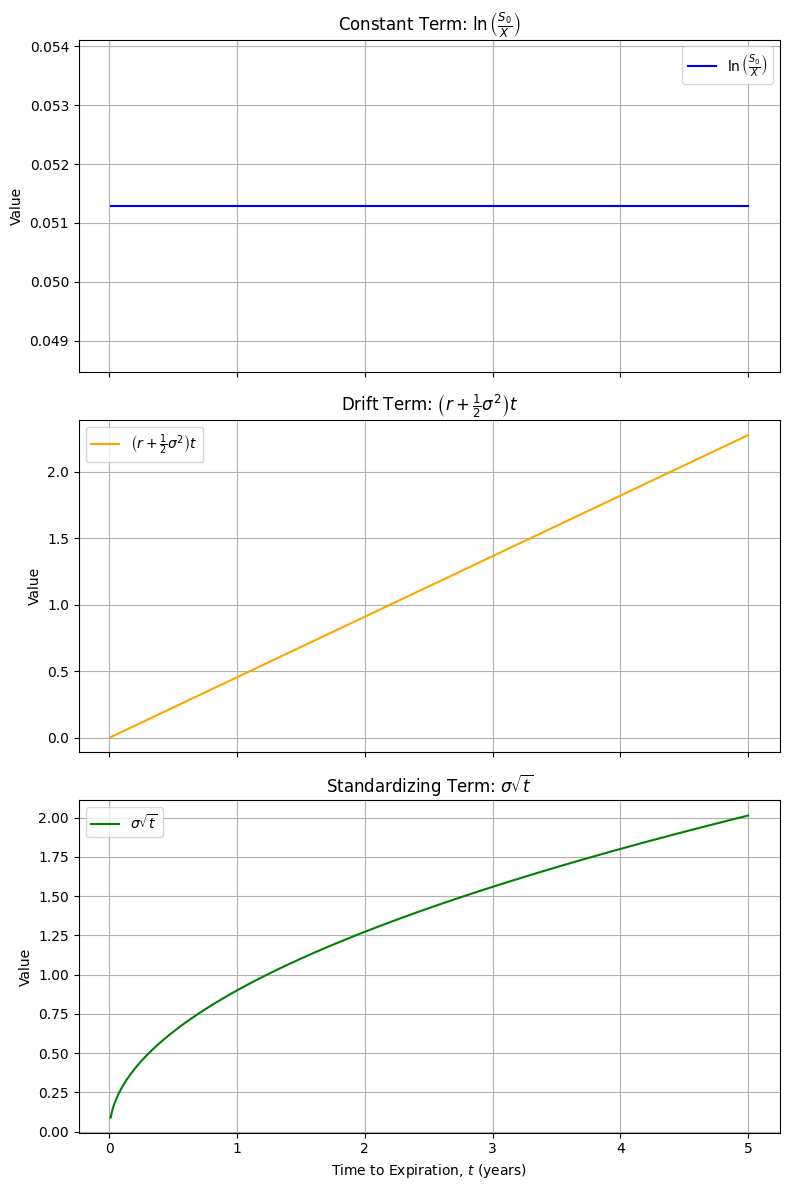

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define fixed parameters
S0 = 100.0    # Current stock price
X = 95.0      # Strike price
r = 0.05      # Risk-free interest rate (annual)
sigma = 0.9   # Volatility (annual)

# Create an array of time values (avoid t=0 to prevent division by zero)
t_values = np.linspace(0.01, 5, 500)

# Element 1: Constant term ln(S0/X)
const_term = np.log(S0 / X)  # This is independent of time

# Element 2: Drift term (r + 0.5*sigma^2) * t
drift_term = (r + 0.5 * sigma**2) * t_values

# Element 3: Standardizing term sigma*sqrt(t)
std_term = sigma * np.sqrt(t_values)

# Create subplots to visualize each element
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Plot constant term
axs[0].plot(t_values, np.full_like(t_values, const_term), label=r'$\ln\left(\frac{S_0}{X}\right)$', color='blue')
axs[0].set_title(r'Constant Term: $\ln\left(\frac{S_0}{X}\right)$')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].grid(True)

# Plot drift term
axs[1].plot(t_values, drift_term, label=r'$\left(r+\frac{1}{2}\sigma^2\right)t$', color='orange')
axs[1].set_title(r'Drift Term: $\left(r+\frac{1}{2}\sigma^2\right)t$')
axs[1].set_ylabel('Value')
axs[1].legend()
axs[1].grid(True)

# Plot standardizing term
axs[2].plot(t_values, std_term, label=r'$\sigma\sqrt{t}$', color='green')
axs[2].set_title(r'Standardizing Term: $\sigma\sqrt{t}$')
axs[2].set_xlabel('Time to Expiration, $t$ (years)')
axs[2].set_ylabel('Value')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
pip install --upgrade pip